In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\6.overlap.csv",header=None)

In [6]:
data.shape

(100, 3)

In [7]:
data.head()

,0,1,2
0,7.0,3.2,0
1,6.4,3.2,0
2,6.9,3.1,0
3,5.5,2.3,0
4,6.5,2.8,0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

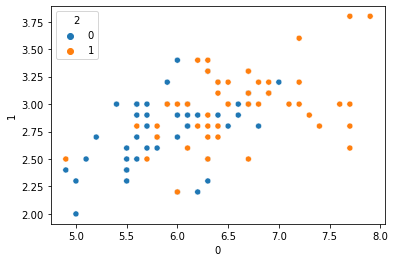

In [8]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [9]:
data[2].value_counts()

0    50
1    50
Name: 2, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [12]:
x_train.shape

(90, 2)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
std=StandardScaler()

In [15]:
stdd=std.fit_transform(x_train)

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-auth<3,>=1.6.3 in c:\users\dell\anaconda3\lib\site-packages (from tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (1.33.0)




[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import tensorflow

In [17]:
import tensorflow.keras 

In [18]:
from tensorflow.keras import Sequential

In [19]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [20]:
model=Sequential()
model.add(Dense(10000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.7))
model.add(Dense(10000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(10000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(10000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.7))
model.add(Dense(1,activation="sigmoid"))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10000)             30000     
                                                                 
 batch_normalization (BatchN  (None, 10000)            40000     
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 10000)             100010000 
                                                                 
 batch_normalization_1 (Batc  (None, 10000)            40000     
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10000)             100010000 
                                                                 
 batch_normalization_2 (Batc  (None, 10000)            4

In [22]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [23]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
8/8 [==============================] - 36s 4s/step - loss: 8.8719 - accuracy: 0.5417 - val_loss: 20947.8203 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 30s 4s/step - loss: 3.3010 - accuracy: 0.6806 - val_loss: 3915.6138 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 31s 4s/step - loss: 1.6824 - accuracy: 0.5556 - val_loss: 393.4895 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 30s 4s/step - loss: 1.2526 - accuracy: 0.5833 - val_loss: 281.6376 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 31s 4s/step - loss: 1.8278 - accuracy: 0.5417 - val_loss: 255.6921 - val_accuracy: 0.5000
Epoch 6/20
8/8 [==============================] - 30s 4s/step - loss: 1.0543 - accuracy: 0.6250 - val_loss: 129.7228 - val_accuracy: 0.5000
Epoch 7/20
8/8 [==============================] - 31s 4s/step - loss: 0.9709 - accuracy: 0.5972 - val_loss: 54.3209 - val_accuracy: 0.5000
Epoch 8/20
8/8 [==

In [25]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

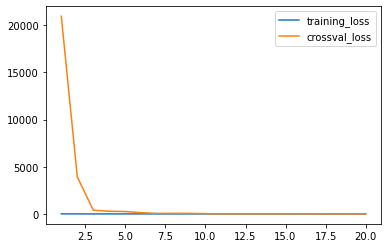

In [26]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [27]:
predi=model.predict(x_train)

3/3 [==============================] - 1s 221ms/step


In [28]:
import numpy as np

In [29]:
preict=np.where(predi>0.5,1,0).flatten()

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
accuracy_score(y_train,preict)


0.5333333333333333

In [32]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 1497s 385ms/step


<AxesSubplot:>

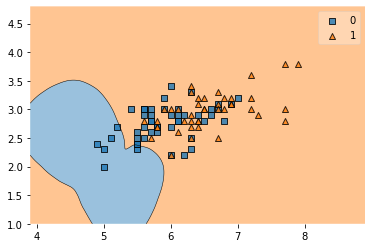

In [33]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)